In [11]:
import sys
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
%matplotlib inline

matplotlib.rc('font', **{'size': 20})
sys.path.append('../01_ML/')
from sklearn.utils.multiclass import type_of_target
from importance_learner import preprocess_temp, preprocess_mag
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold, StratifiedKFold

In [5]:
data_scaled, target_scaled_clf = preprocess_mag(target_type='clf', scale=True)
data, target_clf = preprocess_mag(target_type='clf')

# data, target_clf = preprocess_mag(target_type='clf')

In [3]:
def run_elbow(data, target, n_comps=40, 
              clf=RandomForestClassifier(n_estimators=100), 
             metric='f1_macro'
             ):
    pcas = []
    scores = []
    
    print(f'original {metric}', cross_validate(estimator=clf, 
               X=data, 
               y=target, 
               scoring=metric, n_jobs=-1,
               cv=KFold(n_splits=5, shuffle=True))['test_score'].mean())
    
    for component in range(1, n_comps):

        pca = PCA(n_components=component)
        pcas.append(pca)

        data_trans = pca.fit_transform(data)
        
        score = cross_validate(estimator=clf, 
               X=data_trans, 
               y=target, 
               scoring=metric,
               n_jobs=-1,
               cv=KFold(n_splits=5, shuffle=True))['test_score'].mean()
        
        print('comp: ', component, 'score: ', score)
        
        scores.append(score)
        
    return scores, pcas

In [6]:
sc, pc = run_elbow(data=data_scaled,
                   target=target_scaled_clf,
                   n_comps=10, 
                   clf=RandomForestClassifier(n_estimators=100, n_jobs=-1), 
                   metric='f1_macro')

original f1_macro 0.9451354991144747
comp:  1 score:  0.7005604690875227
comp:  2 score:  0.8372317795467579
comp:  3 score:  0.9146526761932023
comp:  4 score:  0.9181632065743205
comp:  5 score:  0.921067651746544
comp:  6 score:  0.9180120113652835
comp:  7 score:  0.9208961991097278
comp:  8 score:  0.9207518619460137
comp:  9 score:  0.9210364321915403


NameError: name 'plot_elbow' is not defined

In [116]:
pc[2].singular_values_

array([1209.76181536,  679.75040573,  602.98217045])

In [114]:
sorted(zip(data.columns, pc[2].transform(np.eye(99))[:, 0]), key=lambda x: -x[1])[:20]

[('Ssrednee', 0.16574411931500163),
 ('Sk', 0.1644681314336574),
 ('Cn', 0.15610178614704995),
 ('Sera', 0.14485090703245396),
 ('Pozitsija_VTO', 0.13324446118627814),
 ('Hrom', 0.13312691849511799),
 ('Temperatura_v_HEF_zona_2', 0.09999868247768401),
 ('Temperatura_v_SF1_zona_2', 0.09593854110822879),
 ('Tochka_rosy_v_HEF_MP1', 0.08893138683439863),
 ('Temperatura_v_SF1_zona_4', 0.08321968422169806),
 ('Temperatura_v_HEF_zona_1', 0.08276888164454715),
 ('Aljuminij', 0.08117689801382866),
 ('Signal_s_datchika_mehanicheskih_svojstv_IMPOK-1B', 0.07020164368064696),
 ('Temperatura_polosy_na_levoj_motalke_prohod_5', 0.06993473800777461),
 ('Temperatura_polosy_na_levoj_motalke_prohod_1', 0.06576183824805297),
 ('Znachenie_CO_v_SF1_MP4', 0.05890922964014406),
 ('Trend_temperatury_smotki_M12-02', 0.05501331133118573),
 ('Temperatura_v_RTF_zona_4', 0.053200492960701534),
 ('Temperatura_v_RTF_zona_5', 0.05040611125260951),
 ('Temperatura_v_SF1_zona_6', 0.04919944000781939)]

In [112]:
sorted(zip(data.columns, pc[2].transform(np.eye(99))[:, 1]), key=lambda x: -x[1])[:20]

[('hot_len', 0.22057399126657298),
 ('Dlina,_m', 0.21911447573279566),
 ('magn_len', 0.21264271134423085),
 ('norm_len', 0.18660391631383272),
 ('cold1_len', 0.18113469938183174),
 ('cold3_len', 0.1808124403275433),
 ('cold5_len', 0.17928293738917173),
 ('Trend_temperatury_smotki_M12-02', 0.1785116245779434),
 ('decarb_len', 0.17811179158702173),
 ('Temperatura_polosy_v_zone_4C2_AN', 0.15206295584327503),
 ('Temperatura_polosy_v_zone_4', 0.12940307999484513),
 ('Temperatura_polosy_v_zone_4B__AN', 0.10936642771012496),
 ('Trend_temperatury_kontsa_prokatki_M12-02', 0.1079772786122743),
 ('Aljuminij', 0.10431554925658086),
 ('Partija_ANO_PDS', 0.10416020058797468),
 ('Temperatura_v_RTF_zona_1', 0.10355825536139893),
 ('Temperatura_polosy_na_pravoj_motalke_prohod_2', 0.09717979711415019),
 ('Temperatura_v_SF1_zona_3', 0.09194514827690586),
 ('Hrom', 0.08762552100936442),
 ("Skorost'_tehnologicheskoj_sektsii_NS_4", 0.0846892138243678)]

In [113]:
sorted(zip(data.columns, pc[2].transform(np.eye(99))[:, 2]), key=lambda x: -x[1])[:20]

[('Partija_ANO_PDS', 0.2425383518010876),
 ('cold4_len', 0.21419912712368433),
 ('cold2_len', 0.21269218142457436),
 ("Skorost'_tehnologicheskoj_sektsii_NS_4", 0.17377803496765018),
 ('Temperatura_polosy_na_levoj_motalke_prohod_5', 0.15820471289461646),
 ('Nk', 0.1511693123362147),
 ('Temperatura_polosy_na_levoj_motalke_prohod_3', 0.1422251138618957),
 ('R17sr', 0.13836251103192812),
 ('Svojstva_VPS', 0.13789331033607993),
 ('Fosfor', 0.13721217818977666),
 ('Marganets', 0.1327457084747774),
 ('Nsrednee', 0.13105147266603104),
 ('Titan', 0.10198172663245894),
 ('Temperatura_polosy_na_levoj_motalke_prohod_1', 0.10020737170268194),
 ('Nn', 0.09409861532694692),
 ('Aljuminij', 0.08391097190933514),
 ('Kremnij', 0.08159583568734062),
 ('Signal_s_datchika_mehanicheskih_svojstv_IMPOK-1B', 0.07688841788501595),
 ('Temperatura_v_SF1_zona_6', 0.07450140958386084),
 ('Trend_temperatury_kontsa_prokatki_M12-02', 0.07233358539161938)]

In [28]:
RandomForestClassifier(n_estimators=100)\
.fit(X=PCA(n_components=3).fit_transform(data_scaled), y=target_clf).feature_importances_

array([0.35695687, 0.30182358, 0.34121955])

In [18]:
pc_clf[3].transform(np.eye(99))

array([[-5426.47914008,  5327.29425238, -5341.64834436,  7393.85319367],
       [-5426.4785848 ,  5327.2932608 , -5341.64379871,  7393.86136433],
       [-5426.47920367,  5327.29420818, -5341.6484987 ,  7393.85326807],
       [-5426.47916481,  5327.29465622, -5341.64397337,  7393.85154962],
       [-5426.47891479,  5327.29775601, -5341.64278208,  7393.85170523],
       [-5426.47919404,  5327.29415975, -5341.64845467,  7393.85363065],
       [-5426.47912882,  5327.293836  , -5341.64839768,  7393.8533405 ],
       [-5426.41375495,  5327.33943253, -5341.47124898,  7393.79648167],
       [-5426.47887005,  5327.29417476, -5341.64619007,  7393.85652529],
       [-5426.47909011,  5327.29372598, -5341.64887481,  7393.85457278],
       [-5426.47893444,  5327.29418841, -5341.64647746,  7393.85380325],
       [-5426.47894536,  5327.29480143, -5341.64653524,  7393.8585993 ],
       [-5426.36354054,  5327.26779964, -5341.68971311,  7392.87513406],
       [-5426.48128208,  5327.29380735, -5341.66348

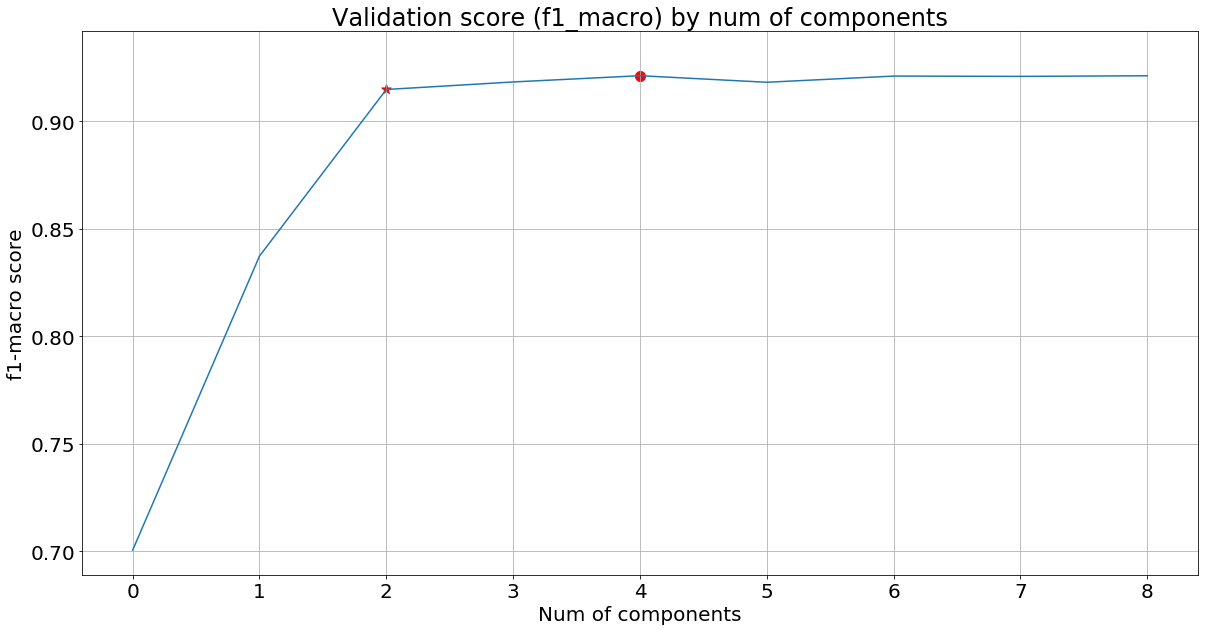

In [12]:
plot_elbow(sc)

In [13]:
sc_clf, pc_clf = run_elbow(data=data,
                   target=target_clf,
                   n_comps=10, 
                   clf=RandomForestClassifier(n_estimators=100, n_jobs=-1), 
                   metric='f1_macro')

original f1_macro 0.9452249273922588
comp:  1 score:  0.6510465817012984
comp:  2 score:  0.7810795042932013
comp:  3 score:  0.9345515951964742
comp:  4 score:  0.940527644957594
comp:  5 score:  0.938047741106941
comp:  6 score:  0.9375948248629598
comp:  7 score:  0.9366731301761879
comp:  8 score:  0.9347333894384648
comp:  9 score:  0.9336225539585301


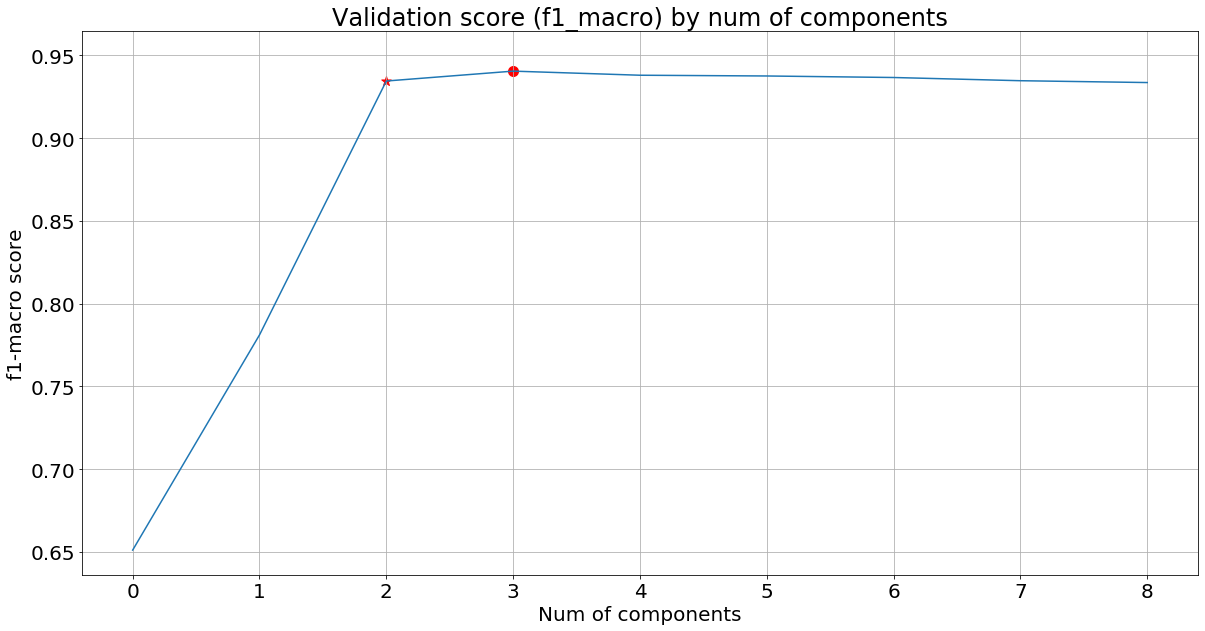

In [14]:
plot_elbow(sc_clf)

In [38]:
sc, pc = run_elbow(data=data, target=target)

original f1 score 0.946192987638417
comp:  1 score:  0.6536379376801513
comp:  2 score:  0.7823880274831769
comp:  3 score:  0.93500694900597
comp:  4 score:  0.9398708848132532
comp:  5 score:  0.9380614823207386
comp:  6 score:  0.9388007959703547
comp:  7 score:  0.9372918007519923
comp:  8 score:  0.9346912216428915
comp:  9 score:  0.9352665809184396
comp:  10 score:  0.9348056502937346
comp:  11 score:  0.935720280199163
comp:  12 score:  0.9314521652711644
comp:  13 score:  0.9333283564642849
comp:  14 score:  0.9321397524843207
comp:  15 score:  0.9326962415661345
comp:  16 score:  0.9309374887548291
comp:  17 score:  0.9328935899617816
comp:  18 score:  0.9327243796981854
comp:  19 score:  0.9327127513347486
comp:  20 score:  0.9329591422454675
comp:  21 score:  0.9306316637383277
comp:  22 score:  0.9317583831462721
comp:  23 score:  0.9297056246405953
comp:  24 score:  0.9309884579684219
comp:  25 score:  0.9292222239704575
comp:  26 score:  0.9271711475757808
comp:  27 scor

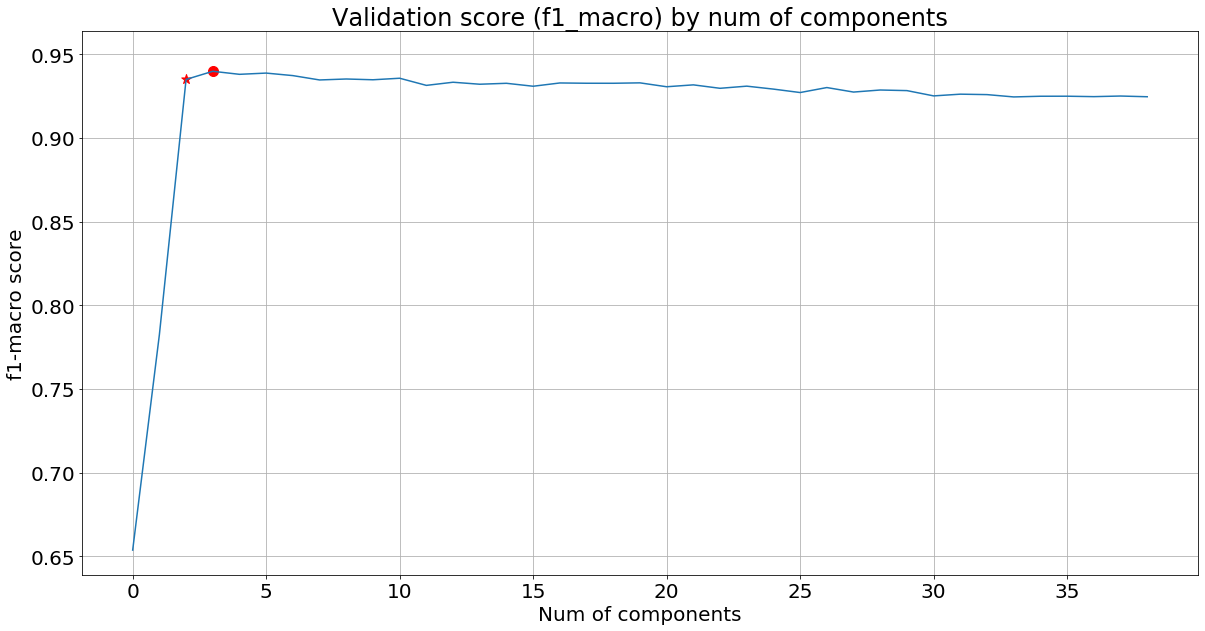

In [61]:


plt.figure(figsize=(20, 10))
plt.title('Validation score (f1_macro) by num of components')

plt.xlabel('Num of components')
plt.ylabel('f1-macro score')

plt.grid()

plt.scatter(np.array(sc).argmax(), np.array(sc).max(), c='r', s=100)
plt.scatter(2, sc[2], c='r', s=100, marker='*')

plt.plot(sc)

In [7]:
def plot_elbow(sc):
    matplotlib.rc('font', **{'size': 20})

    plt.figure(figsize=(20, 10))
    plt.title('Validation score (f1_macro) by num of components')

    plt.xlabel('Num of components')
    plt.ylabel('f1-macro score')

    plt.grid()

    plt.scatter(np.array(sc).argmax(), np.array(sc).max(), c='r', s=100)
    plt.scatter(2, sc[2], c='r', s=100, marker='*')

    plt.plot(sc)

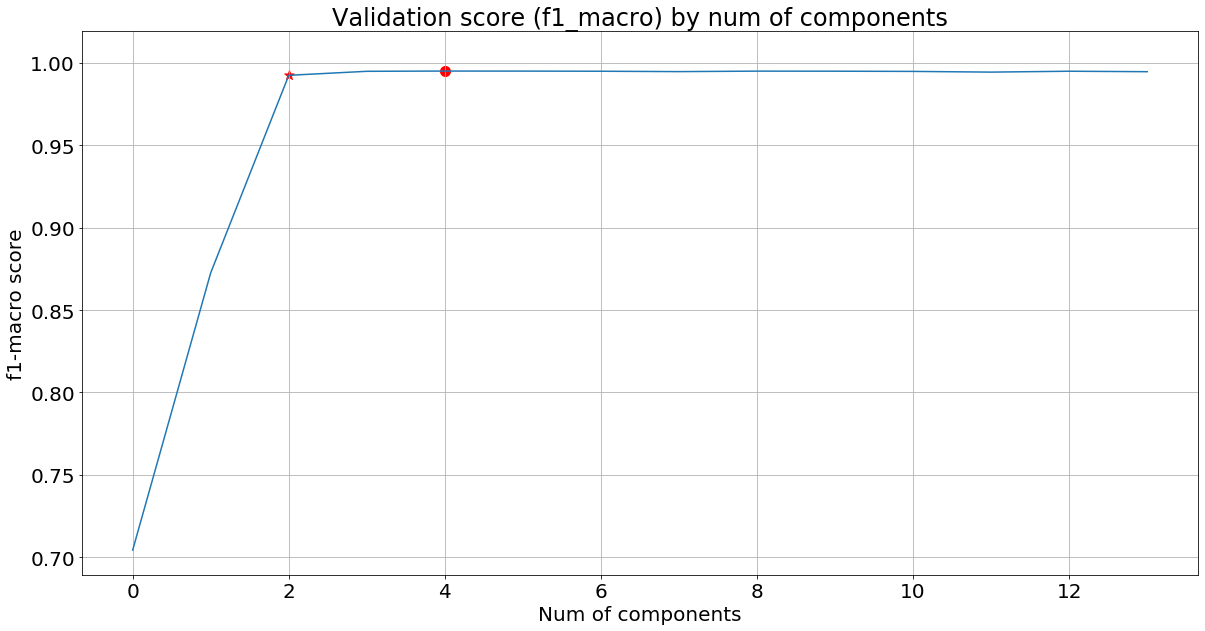

In [68]:
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

matplotlib.rc('font', **{'size': 20})

plt.figure(figsize=(20, 10))
plt.title('Validation score (f1_macro) by num of components')

plt.xlabel('Num of components')
plt.ylabel('f1-macro score')

plt.grid()

plt.scatter(np.array(sc).argmax(), np.array(sc).max(), c='r', s=100)
plt.scatter(2, sc[2], c='r', s=100, marker='*')

plt.plot(sc)

In [ ]:
sc_bimode, pc_bimode = run_elbow(data=data, target=target)

In [53]:
import numpy as np

In [66]:
data, target = preprocess_mag(target_type='bimod')
sc, pc = run_elbow(data=data, target=target, n_comps=15)

original f1 score 0.9952061443750895
comp:  1 score:  0.7042806936469947
comp:  2 score:  0.8726064516728037
comp:  3 score:  0.992472722097441
comp:  4 score:  0.9949086454519624
comp:  5 score:  0.9950565033313961
comp:  6 score:  0.9950304022459294
comp:  7 score:  0.9949502319662014
comp:  8 score:  0.9947242460168029
comp:  9 score:  0.9950106704214047
comp:  10 score:  0.9949766818851197
comp:  11 score:  0.9948466758764944
comp:  12 score:  0.994419432269909
comp:  13 score:  0.9949532467266107
comp:  14 score:  0.9946724233634792


original r2 0.9860516549732138
comp:  1 score:  -0.12861648589674365
comp:  2 score:  0.3267793446543267
comp:  3 score:  0.9531715463431107
comp:  4 score:  0.9789319581038317
comp:  5 score:  0.9770467420897191
comp:  6 score:  0.9774867281826681
comp:  7 score:  0.9731665062379016
comp:  8 score:  0.9766260069568308
comp:  9 score:  0.9773592577124941
comp:  10 score:  0.975161415491549
comp:  11 score:  0.9758966767090502
comp:  12 score:  0.977684994994172
comp:  13 score:  0.9718627389555541
comp:  14 score:  0.9715947188228883


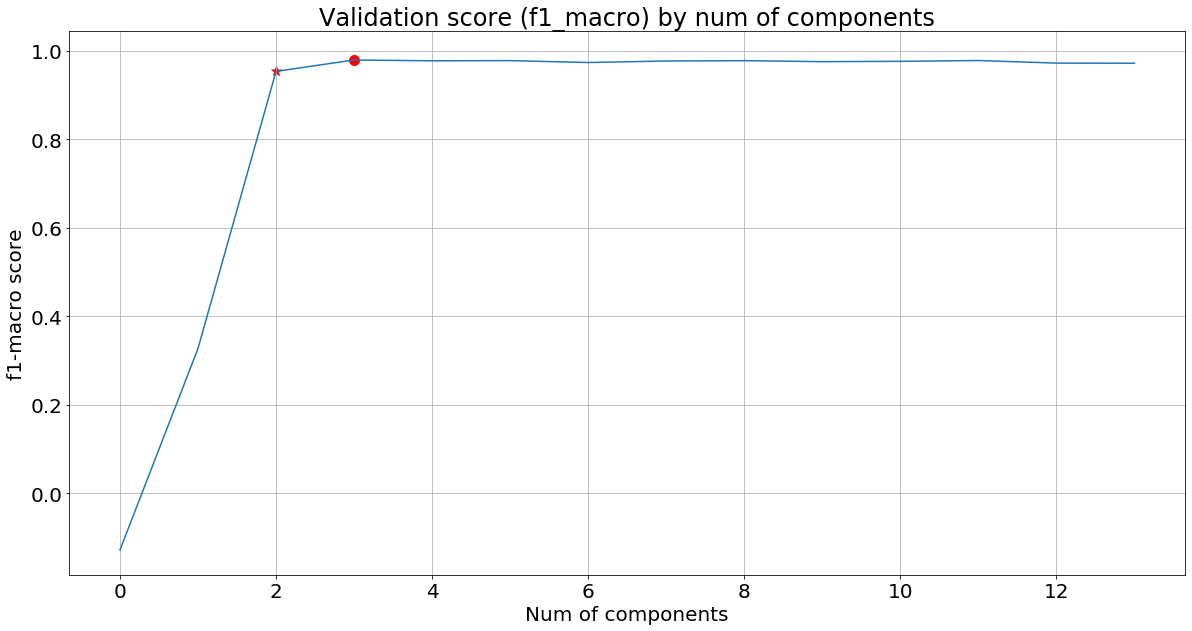

In [77]:
data, target = preprocess_mag(target_type='reg')
sc, pc = run_elbow(data=data, target=target, n_comps=15, 
                   clf=RandomForestRegressor(n_estimators=100, n_jobs=-1), metric='r2')
plot_elbow(sc)